Going to start with just one point orbiting something fixed and then upgrade it two points of equal mass orbiting each other and try adjusting initial conditions to see what kind of stable orbit evolves. Will use RK4 for everything for now.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
sys.path.append(os.path.join('..', 'importantfunctions'))
from ODEsolvers import *

In [12]:
#this is the diffeq to do one body orbiting a fixed point
def f(r,t,M): #where r is the vector (x,y,vx,vy)
    x=r[0]
    y=r[1]
    vx=r[2]
    vy=r[3]
    R=(x**2+y**2)**0.5
    return np.array([vx,vy,-G*M*x/(R**3),-G*M*y/(R**3)],float)

In [13]:
G=6.6738e-11 #gravitational constant
M=1.989e30 #msun in kg
x0=-1.471e11
y0=0
vx0=0
vy0=3.0287e4
R0=np.array([x0,y0,vx0,vy0])
h=60*60*24 #1day in seconds
YR=3.154e7 #approximate seconds in a year

In [14]:
Ts,Rs=RK4(f,R0,M,h=h,maxt=3*YR)

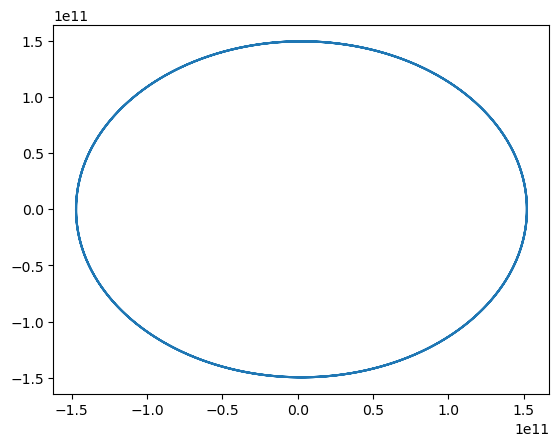

In [15]:
plt.plot(Rs[:,0],Rs[:,1])

Okay now do two bodies orbiting each other.

In [259]:
#this is the diffeq to do two bodies orbiting each other
def f2(r1,r2,t,m2): #where r1 is the vector (x,y,vx,vy) for this object and r2 is for the other object in the system
    x=r2[0]-r1[0]
    y=r2[1]-r1[1]
    vx=r1[2]
    vy=r1[3]
    R=(x**2+y**2)**0.5
    return np.array([vx,
                     vy,
                     G*m2*x/(R**3),
                     G*m2*y/(R**3)],float)

In [247]:
Ms=1.989e30 #msun in kg
Me=Ms/10 #need the masses to be pretty close to each other to see any motion of the other object
Rs0=np.array([0,0,0,-1]) #the sun has some starting velocity probably but not much
Re0=np.array([1.5e11,0,0,3.0287e4]) #starting coordinates of earth
h=60*60*24 #1day in seconds
YR=3.154e7 #approximate seconds in a year

In [249]:
T=np.arange(0,3*YR,h)
Rs=np.zeros((T.size,4))
Rs[0,:]=Rs0
Re=np.zeros((T.size,4))
Re[0,:]=Re0

In [251]:
Rs

array([[ 0.,  0.,  0., -1.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.]])

In [253]:
# #just do Euler with both bodies first 
# for i in range(1, 100): 
#     Rs[i]=Rs[i-1]+h*f(Rs[i-1],Re[i-1],T[i-1],Me)
#     Re[i]=Re[i-1]+h*f(Re[i-1],Rs[i-1],T[i-1],Ms)

In [255]:
for i in range(1, len(T)): #starting at the second point
    t=T[i-1]
    rs=Rs[i-1]
    re=Re[i-1]

    ks1, ke1=h*f2(rs,re,t,Me), h*f2(re,rs,t,Ms)
    ks2, ke2=h*f2(rs+0.5*ks1,re+0.5*ke1,t+0.5*h,Me), h*f2(re+0.5*ke1,rs+0.5*ks1,t+0.5*h,Ms)
    ks3, ke3=h*f2(rs+0.5*ks2,re+0.5*ke2,t+0.5*h,Me), h*f2(re+0.5*ke2,re+0.5*ks2,t+0.5*h,Ms)
    ks4, ke4=h*f2(rs+ks3,re+ke3,t+h,Me), h*f2(re+ke3,rs+ks3,t+h,Ms)
    
    Rs[i]=rs+(1/6)*(ks1+2*ks2+2*ks3+ks4)
    Re[i]=re+(1/6)*(ke1+2*ke2+2*ke3+ke4)

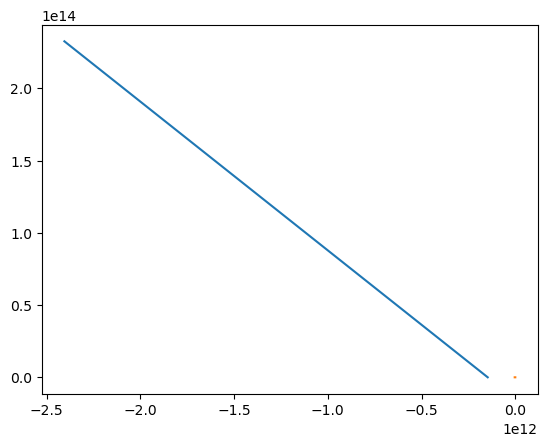

In [257]:
plt.plot(Re[:,0],Re[:,1])
plt.plot(Rs[:,1],Rs[:,1])